In [2]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

# Symbolic Case

You know the formula explicitly 

$$f(x) = ... $$

In this case there are two options

1. The integral can be solved analytically $\int f(x) dx = \text{Something you can write down}$
2. The integral cannot be solved analytically

We can try sympy at first to see if the integral can be solved analytically



## Part 1: "Solvable" Integrals

**Example**: Find $\int \sin^3(x) e^{-5x} dx$

In [8]:
x = smp.symbols('x', real=True)
f = smp.sin(x)**3 * smp.exp(-5*x)

In [9]:
smp.integrate(f, x)

-40*exp(-5*x)*sin(x)**3/221 - 21*exp(-5*x)*sin(x)**2*cos(x)/221 - 15*exp(-5*x)*sin(x)*cos(x)**2/442 - 3*exp(-5*x)*cos(x)**3/442

**Example**: Find $\int \cos(bx)e^{-ax} dx$

In [10]:
a, b = smp.symbols('a b', real=True, positive=True)
f = smp.cos(b*x)* smp.exp(-a*x)

In [13]:
smp.integrate(f, x).simplify()

(-a*cos(b*x) + b*sin(b*x))*exp(-a*x)/(a**2 + b**2)

**Example**: Find  $\int \frac{(1+\sqrt{x})^{1/3}}{\sqrt{x}} dx$

In [14]:
f = (1+smp.sqrt(x))**smp.Rational(1,3) / smp.sqrt(x)
smp.integrate(f, x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

**Example** (Definite) Find $\int_{0}^{\ln(4)}\frac{e^x}{\sqrt{e^{2x}+9}} dx$

In [17]:
f = smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9)
smp.integrate(f, (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

**Example** (Improper) Find $ \int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1+x^2} dx $

In [18]:
f = 16*smp.atan(x) / (1+x**2)
smp.integrate(f, (x, 0, smp.oo))

2*pi**2

## Part 2: "Unsolvable" Integrals

**Example**: Find $\int_{1}^{2} e^{-\sin(x)} dx$

Won't run

In [22]:
#f = smp.exp(-smp.sin(x))
#smp.integrate(f, (x, 1, 2)).simplify()

So we use scipy's `quad` function to integrate numerically

In [23]:
f = lambda x: np.exp(-np.sin(x))

In [28]:
f = lambda x: np.exp(-np.sin(x))
quad(f, 1, 2)

(0.3845918142796868, 4.2698268729567035e-15)

**Example**: Find $\int_{0}^{2\pi} \frac{1}{(a-\cos(x))^2 + (b-\sin(x))^2} dx$

In [ ]:
#f = 1/((a-smp.cos(x))**2 + (b-smp.sin(x))**2)
#smp.integrate(f, (x, 0, 2*smp.pi)).simplify()

This won't run as this does not have an analytical solution. We must solve it numerically, and thus we need choose values of $a$ and $b$ each time

In [31]:
f = lambda x: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
a, b = 2, 3
quad(f, 0, 2*np.pi)

(0.5235987755982989, 1.9168823883823662e-13)

We can solve this for many different values of $a$ and $b$ quickly as follows:

In [38]:
def f(x, a, b):
    return 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)

In [39]:
a_array = np.arange(2,10,1)
b_array = np.arange(2,10,1)
integrals = [[a, b, quad(f, 0, 2*np.pi, args=(a,b))[0]] for a in a_array for b in b_array]

# Numerical Case

This is the case where one collects actual data and wants to find the integral

**Example**: Electric Pulses in particle physics experiments

In [51]:
x, y = np.loadtxt('../Data/sample_data3.txt')

Suppose this is current measured $I(t)$

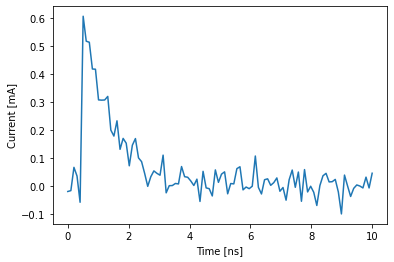

In [52]:
plt.plot(x,y)
plt.xlabel('Time [ns]')
plt.ylabel('Current [mA]')
plt.savefig('example.png', dpi=200)
plt.show()

Now in some detector experiments, energy is proportional to integrated current so $\text{Energy} \propto \int I(t) dt$

In [45]:
integral = cumulative_trapezoid(y,x, initial=0)

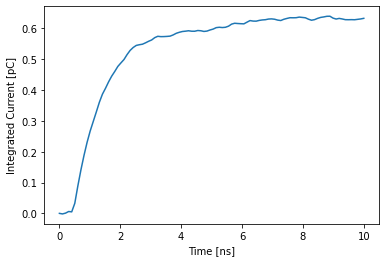

In [46]:
plt.plot(x, integral)
plt.xlabel('Time [ns]')
plt.ylabel('Integrated Current [pC]')
plt.show()

**Example**: Covid Data

In [47]:
x, y = np.loadtxt('../data/coviddata.txt')

Plot cases per day

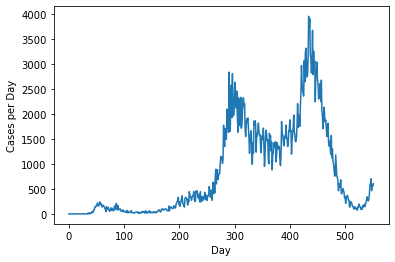

In [48]:
plt.plot(x,y)
plt.xlabel('Day')
plt.ylabel('Cases per Day')
plt.show()

Can find the cumulative number of cases by taking the integral

In [49]:
integral = cumulative_trapezoid(y,x, initial=0)

And plot

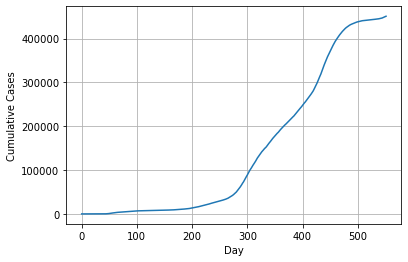

In [50]:
plt.plot(x,integral)
plt.xlabel('Day')
plt.ylabel('Cumulative Cases')
plt.grid()
plt.show()